<a href="https://colab.research.google.com/github/DaryaTereshchenko/DaryaTereshchenko/blob/main/Glove_SM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.initializers import Constant

## Plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [2]:
import nltk
from nltk import word_tokenize
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords


In [123]:
data = pd.read_csv("binary_ethos.csv", sep=",", encoding="utf-8")
data

,text,lable
0,You should know women's sports are a joke,1
1,You look like Sloth with deeper Downs syndrome,1
2,You look like Russian and speak like Indian. B...,1
3,"Women deserve to be abused, I guess.",1
4,Women are made for making babies and cooking d...,1
...,...,...
983,A man' s chance of getting cancer is 44 and 23...,0
984,2 comments 4 likes and no views gg youtube,0
985,' Nah cut it off Im sure I won' t regret it ',0
986,Oh and NIki pronounced mademoiselle Maupin wa...,0


In [124]:
nltk.download('stopwords')
nltk.download('punkt')
import regex as re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [125]:
def clean_text(line):
  stops = set(stopwords.words("english"))
  processed_line = line.lower()
  words = [word for word in word_tokenize(processed_line)]
  processed_line = [word for word in words if word not in stops and word not in set(string.punctuation)]
  text = " ".join(processed_line)
  return text

In [126]:
data['text'] = data['text'].map(lambda x: clean_text(x))
sentence_list = [sent for sent in data.text]

In [188]:
hate_speech = np.load('binary_hate.npy')
neutral = np.load('binary_neutral.npy')
df_hate = pd.DataFrame(hate_speech)
df_neutral = pd.DataFrame(neutral)
df_hate["lable"] = 1
df_neutral["lable"] = 0
frames = [df_hate, df_neutral]
df_sm = pd.concat(frames)


0      1
1      1
2      1
3      1
4      1
      ..
551    0
552    0
553    0
554    0
555    0
Name: lable, Length: 988, dtype: int64


In [203]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

a = df_sm.drop("lable", axis=1)
b = df_sm["lable"]
print(a.shape)
print(b)

scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(a))

pca = PCA(n_components = 20)
pca.fit(scaled_data)

data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=range(1,21))
data_pca

(988, 146)
0      1
1      1
2      1
3      1
4      1
      ..
551    0
552    0
553    0
554    0
555    0
Name: lable, Length: 988, dtype: int64


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.118893,-3.337597,1.242876,0.525947,-0.322129,-0.238853,0.229953,-0.022283,1.035923,-3.390623,-1.282268,-3.152543,-0.766684,-1.086049,-2.513620,-0.284934,0.969152,-0.835279,-0.644886,0.716894
1,-0.654836,-0.498210,-1.884412,0.383380,-1.079148,-0.628947,1.945417,-1.584645,-0.296528,-3.619739,-2.923621,-0.658833,-1.317798,-0.262969,1.591905,2.323392,0.317624,-1.107702,-1.429408,-0.362574
2,-4.532962,-3.593741,0.721561,-1.814482,-0.232120,-0.229494,0.104728,0.621263,2.384702,-1.460805,0.348370,0.666876,0.137378,-0.122976,-0.310728,0.584577,-0.458851,-0.604747,0.044569,0.239099
3,-3.465822,-5.034046,3.045930,-4.874498,1.098341,-2.590873,0.362008,-2.674609,7.115539,1.295157,-1.300402,1.387906,3.085927,-1.888200,1.605104,6.741614,-2.570820,8.540095,1.625512,4.092541
4,1.447168,-1.488463,0.140200,-1.921146,0.702730,-0.537799,-0.379474,1.415163,-1.471560,1.839179,-0.576248,-0.453152,0.577501,0.728383,1.232793,-3.191101,-1.093300,-0.913910,-2.689953,3.481081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,-3.000074,1.208956,1.812675,1.974232,-0.983995,0.702663,0.500431,-0.224141,-0.311002,0.983702,-0.503587,-0.228516,0.900380,-0.516360,1.828013,-0.184617,-0.815669,0.918631,-0.242259,-0.218998
984,-0.514833,0.715855,0.571782,1.912231,0.179664,-1.139923,-1.100307,-0.581572,-0.942351,-1.424691,1.150662,0.302514,-0.274250,-1.421620,-1.999726,0.175933,1.573092,1.960757,1.477928,-1.039002
985,-0.720634,-1.381572,-0.572326,1.658019,-0.815944,-0.809736,-0.289203,0.990436,0.398488,-1.287608,1.282234,0.245131,-1.249222,0.586833,-0.743295,0.924146,0.566251,0.858731,2.558601,-1.152880
986,-1.459264,0.593266,0.014472,-0.386168,-0.504546,-1.350015,2.151809,-0.158362,0.601559,0.075180,-1.055507,-1.148699,2.476109,-0.749575,0.436474,-0.619618,-0.712265,-0.612303,-1.116343,-1.553222


In [128]:
embedding_dict = {}
with open("glove.twitter.27B.100d.txt", "r") as f:
  for line in f:
    values = line.split()
    word = values[0]
    vectors = np.asarray(values[1:], "float32")
    embedding_dict[word] = vectors
  f.close()


In [129]:
num_words = 20
sent = ["feel like ai apocalypse ai would kill humans could n't serve purpose disabled people like one would probably go often ca n't work effectively",
"proud mom wish allah give strong saying alhamdulillah husband son allah give mercy beautifull died supprising crying son husband die still alive jannah aamiin ...",
"someone professionally diagnosed mental illnesses find disrespectful disgusting making profit making jokes different story though make jokes help cope line joking disrespectful",
"clinically depressed blew mind due stress say oh man getting anxiety ugh depressed brings attention want fact people make illnesses fashion merch makes feel like everyone looking people directions memes relatable funny relieving said people post memes mental illness .. made wonder alot ik people capable nowadays"]

In [218]:
def transformed(sent):
  s = []
  for word in sent.split():
    if embedding_dict.get(word) is not None:
      s.append(embedding_dict.get(word))
      if len(s) == 20:
        return np.stack(s, axis=0)
  return np.stack(s, axis=0)

def padded_matrix(matrix, num_words):
  if matrix.shape[0] < num_words:
    zeros = np.zeros((num_words - int(matrix.shape[0]), matrix.shape[1]))
    new_matrix = np.concatenate((zeros, matrix), axis=0)
    return new_matrix
  else:
    return matrix

def multiplied(matrix):
  return matrix.dot(np.ones((100,1)))

finalM = []
for i in sentence_list:
  embed = transformed(i)
  new_matrix = padded_matrix(embed, num_words)
  vector = multiplied(new_matrix).T
  finalM.append(vector)
sm_vectors = np.asarray(df_sm.drop("lable", axis=1))

MatrixF = np.concatenate(finalM, axis=0)

sm_glov = np.concatenate((MatrixF, sm_vectors), axis=1)


(988, 166)

In [150]:
df_general = pd.DataFrame(MatrixF)
df_general["lbl"] = data["lable"]
shuffled = df_general.sample(frac = 1, random_state=300)

X = shuffled.drop("lbl", axis=1)
y = shuffled["lbl"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [226]:
df_general_s = pd.DataFrame(sm_glov)
df_general_s["lbl"] = data["lable"]
sm_gv = df_general_s.sample(frac = 1, random_state=300)

X_s = sm_gv.drop("lbl", axis=1)
y_s = sm_gv["lbl"]

from sklearn.model_selection import train_test_split
X_t, X_te, y_t, y_te = train_test_split(X_s, y_s, test_size=0.20, random_state=0)
y_t

618    0
474    0
848    0
159    1
334    1
      ..
431    1
908    0
613    0
234    1
958    0
Name: lbl, Length: 790, dtype: int64

In [228]:
from sklearn.preprocessing import StandardScaler
# Normalize the data
sc = StandardScaler()
normed_train_data = pd.DataFrame(sc.fit_transform(X_t))
normed_test_data = pd.DataFrame(sc.fit_transform(X_te))

In [230]:
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier 
clf = RandomForestClassifier(n_estimators=800, max_features="auto", max_depth=140)

# Training the model on the training dataset
# fir function is used to train the model using the training sets as parameters
clf.fit(normed_train_data, y_t)

#performing predictions on the test dataset
y_pred = clf.predict(normed_test_data)

print (clf.score(normed_train_data, y_t))
print(clf.score(normed_test_data, y_te))

#metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_te, y_pred))

1.0
0.6111111111111112

ACCURACY OF THE MODEL:  0.6111111111111112


In [231]:
from sklearn.metrics import make_scorer, classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.61      0.78      0.68       107
           1       0.61      0.42      0.50        91

    accuracy                           0.61       198
   macro avg       0.61      0.60      0.59       198
weighted avg       0.61      0.61      0.60       198





In [232]:
unique_label = np.unique([y_test, y_pred])
cmtx = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels=unique_label), 
    index=[x for x in unique_label], 
    columns=[x for x in unique_label]
)
print(cmtx)

    0   1
0  83  24
1  53  38


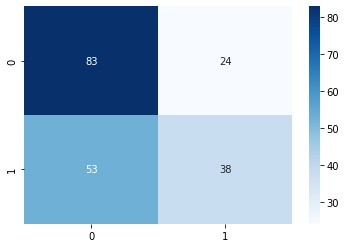

In [233]:
import seaborn as sns
sns.heatmap(cmtx, annot=True, cmap='Blues')